In [1]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

In [2]:
place = 'Kamppi, Helsinki, Finland'
graph_ox = ox.graph_from_place(place,network_type='drive')

# print(type(graph_ox))
# fig, ax = ox.plot_graph(graph_ox,edge_color='y')

graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
# graph.nodes()
# graph.edges(data=True)



hf.fill_maxspeed(graph)

graph.edges(data=True)
times = {e: graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"] for e in graph.edges()}
capacities = {e: 1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000 for e in graph.edges()}
nx.set_edge_attributes(graph, times,"c")
nx.set_edge_attributes(graph, capacities,"cap")

living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30


array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

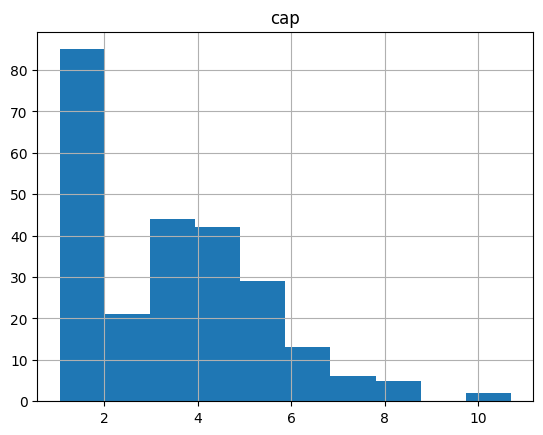

In [5]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]].hist(bins=10)

In [6]:
graph.nodes(data=True)
# df = nx.to_pandas_nodelist(graph, nodelist=graph.nodes())
# df[["cap"]].hist(bins=10)
# df

NodeDataView({0: {'y': 60.1647939, 'x': 24.9210566, 'street_count': 4}, 1: {'y': 60.1636645, 'x': 24.9210282, 'street_count': 4}, 2: {'y': 60.164631, 'x': 24.9212859, 'street_count': 3}, 3: {'y': 60.1643255, 'x': 24.9370233, 'street_count': 4}, 4: {'y': 60.1659479, 'x': 24.9416738, 'street_count': 4}, 5: {'y': 60.1651348, 'x': 24.939344, 'highway': 'traffic_signals', 'street_count': 4}, 6: {'y': 60.1653511, 'x': 24.9355842, 'street_count': 4}, 7: {'y': 60.1634458, 'x': 24.9345002, 'street_count': 4}, 8: {'y': 60.1711426, 'x': 24.9324437, 'street_count': 4}, 9: {'y': 60.1694182, 'x': 24.9273621, 'street_count': 3}, 10: {'y': 60.1707248, 'x': 24.9315761, 'street_count': 3}, 11: {'y': 60.1664916, 'x': 24.9306919, 'street_count': 4}, 12: {'y': 60.1669427, 'x': 24.9272265, 'highway': 'traffic_signals', 'street_count': 3}, 13: {'y': 60.1641708, 'x': 24.9266982, 'street_count': 4}, 14: {'y': 60.1657346, 'x': 24.9261818, 'street_count': 1}, 15: {'y': 60.1636339, 'x': 24.9274293, 'street_count'

In [3]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(15,91,5)])

# hf.plot_multigraph(graph, with_labels=True, font_size=10)

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 3. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

In [10]:
# from networkx.drawing.nx_agraph import write_dot
# write_dot(graph,'multi.dot')

In [15]:
# nx.write_latex(graph,"latex_graph.txt")
# from network2tikz import plot
# plot(graph,'mypdf.pdf')

In [7]:
list(graph.edges())[179]

(92, 91)

[((0, 3225.0), 0)]


/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


30 6.556510925292969e-08
****[((True, 24), 1), ((True, 24), 2)]
51 1.678466796875e-05
*[((True, 24), 2)]
51 0.06875
VSE PREISKANO
0 / 0: neki z: 3225.0, zLD: 24 cap_ok = False (15, 91)(29),(0, 3, 4) 
	1 / 1: feasible FEASIBLE for I OPTIMAL for I z: 28.0, zLD: 28 cap_ok = True
	2 / 2: feasible FEASIBLE for I OPTIMAL for I z: 24.0, zLD: 24 cap_ok = True

2 / 2: feasible FEASIBLE for I OPTIMAL for I z: 24.0, zLD: 24 cap_ok = True
  (24, 0)	1.0
  (29, 0)	4.0
  (32, 0)	1.0
  (179, 0)	1.0


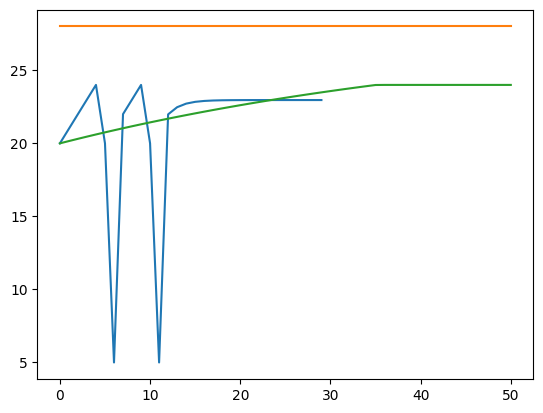

In [4]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=50)
# TODO LB je prevelik, ker obstaja pot s ceno 24

In [42]:
# LB, UB, X_best = hf.run2(obj,constraints,vp,MAX_ITER=1000)
# print(LB,UB,X_best)

In [13]:
n_best.sol["z"]

28.0

k	COLOR
0 	 b


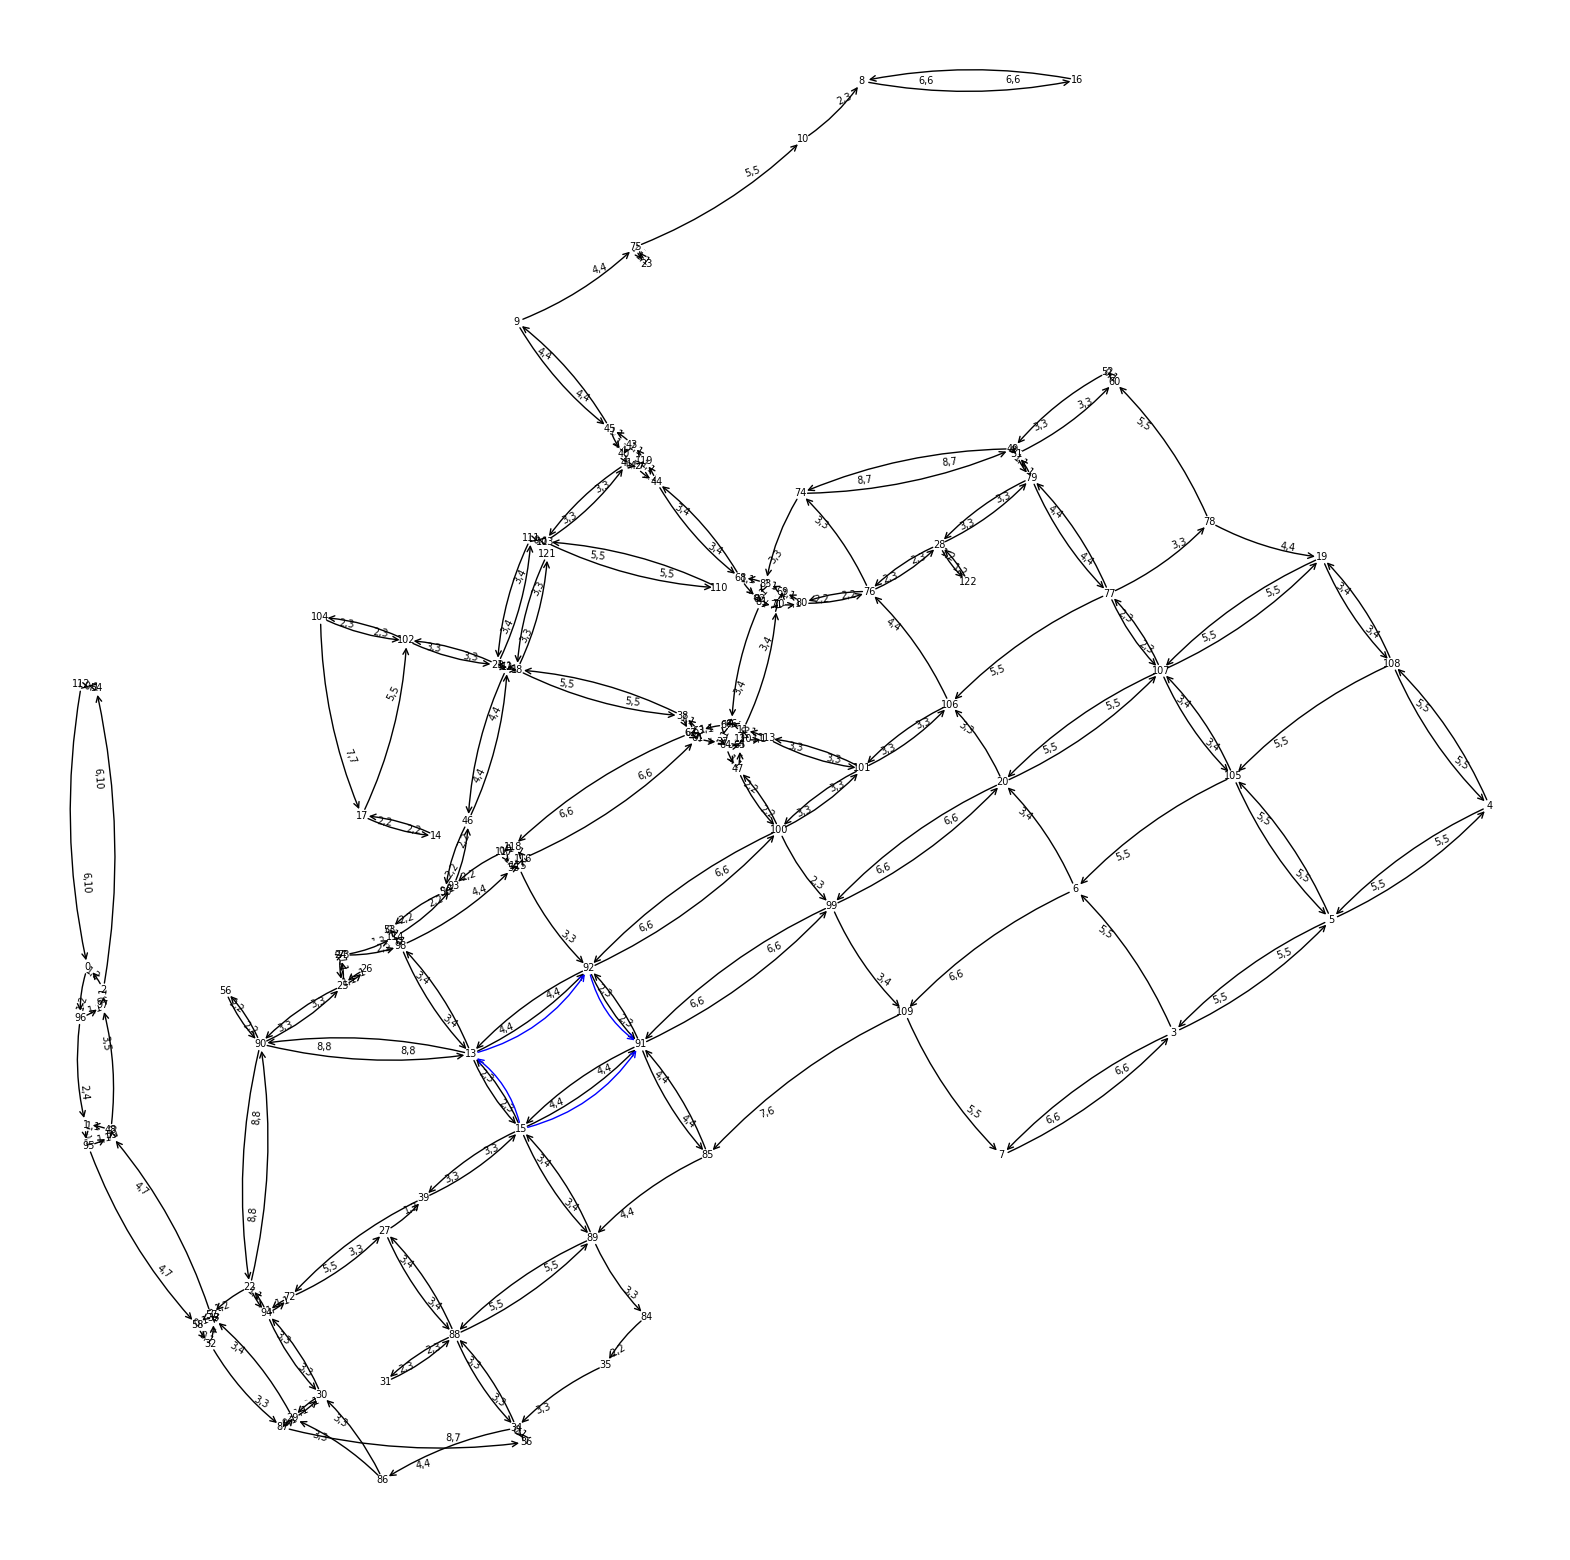

In [44]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)

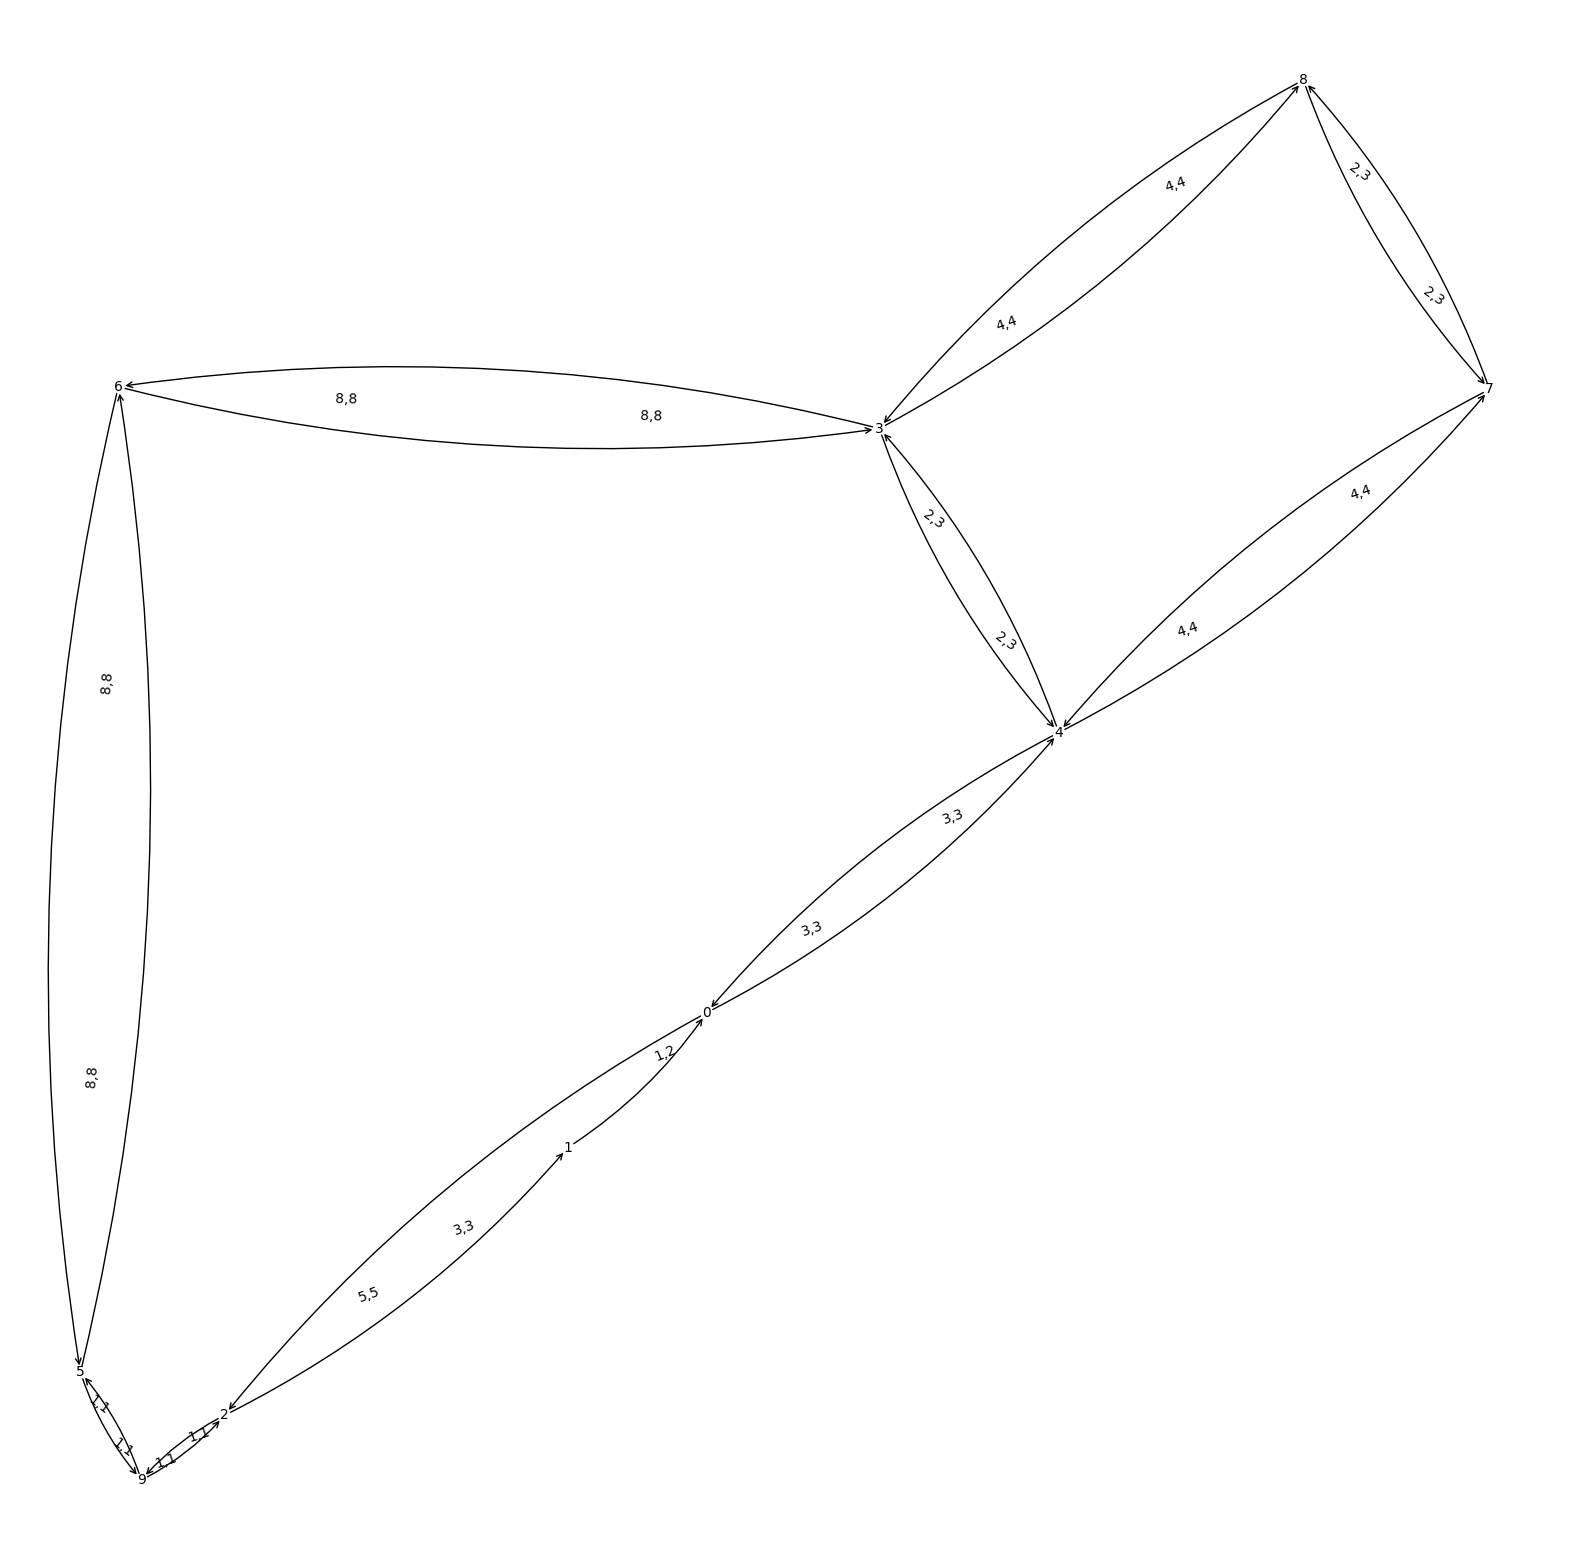

In [14]:

subgraph = nx.convert_node_labels_to_integers(graph.subgraph([92,91,15,13,39,27,72,94,22,90]))
hf.plot_multigraph(subgraph, with_labels=True, font_size=10)

In [3]:
# obj1,constraints1,vp1 = hf.init_from_graph(subgraph,[(15,91,5)])
obj1,constraints1,vp1 = hf.init_from_graph(subgraph,[(4,7,5)])
n_best = hf.run(obj1,constraints1,vp1,graph,MAX_ITER=40,MAX_ITER_LR=50)

NameError: name 'subgraph' is not defined

In [8]:
# df = nx.to_pandas_edgelist(subgraph, nodelist=graph.nodes())
# df

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 3. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

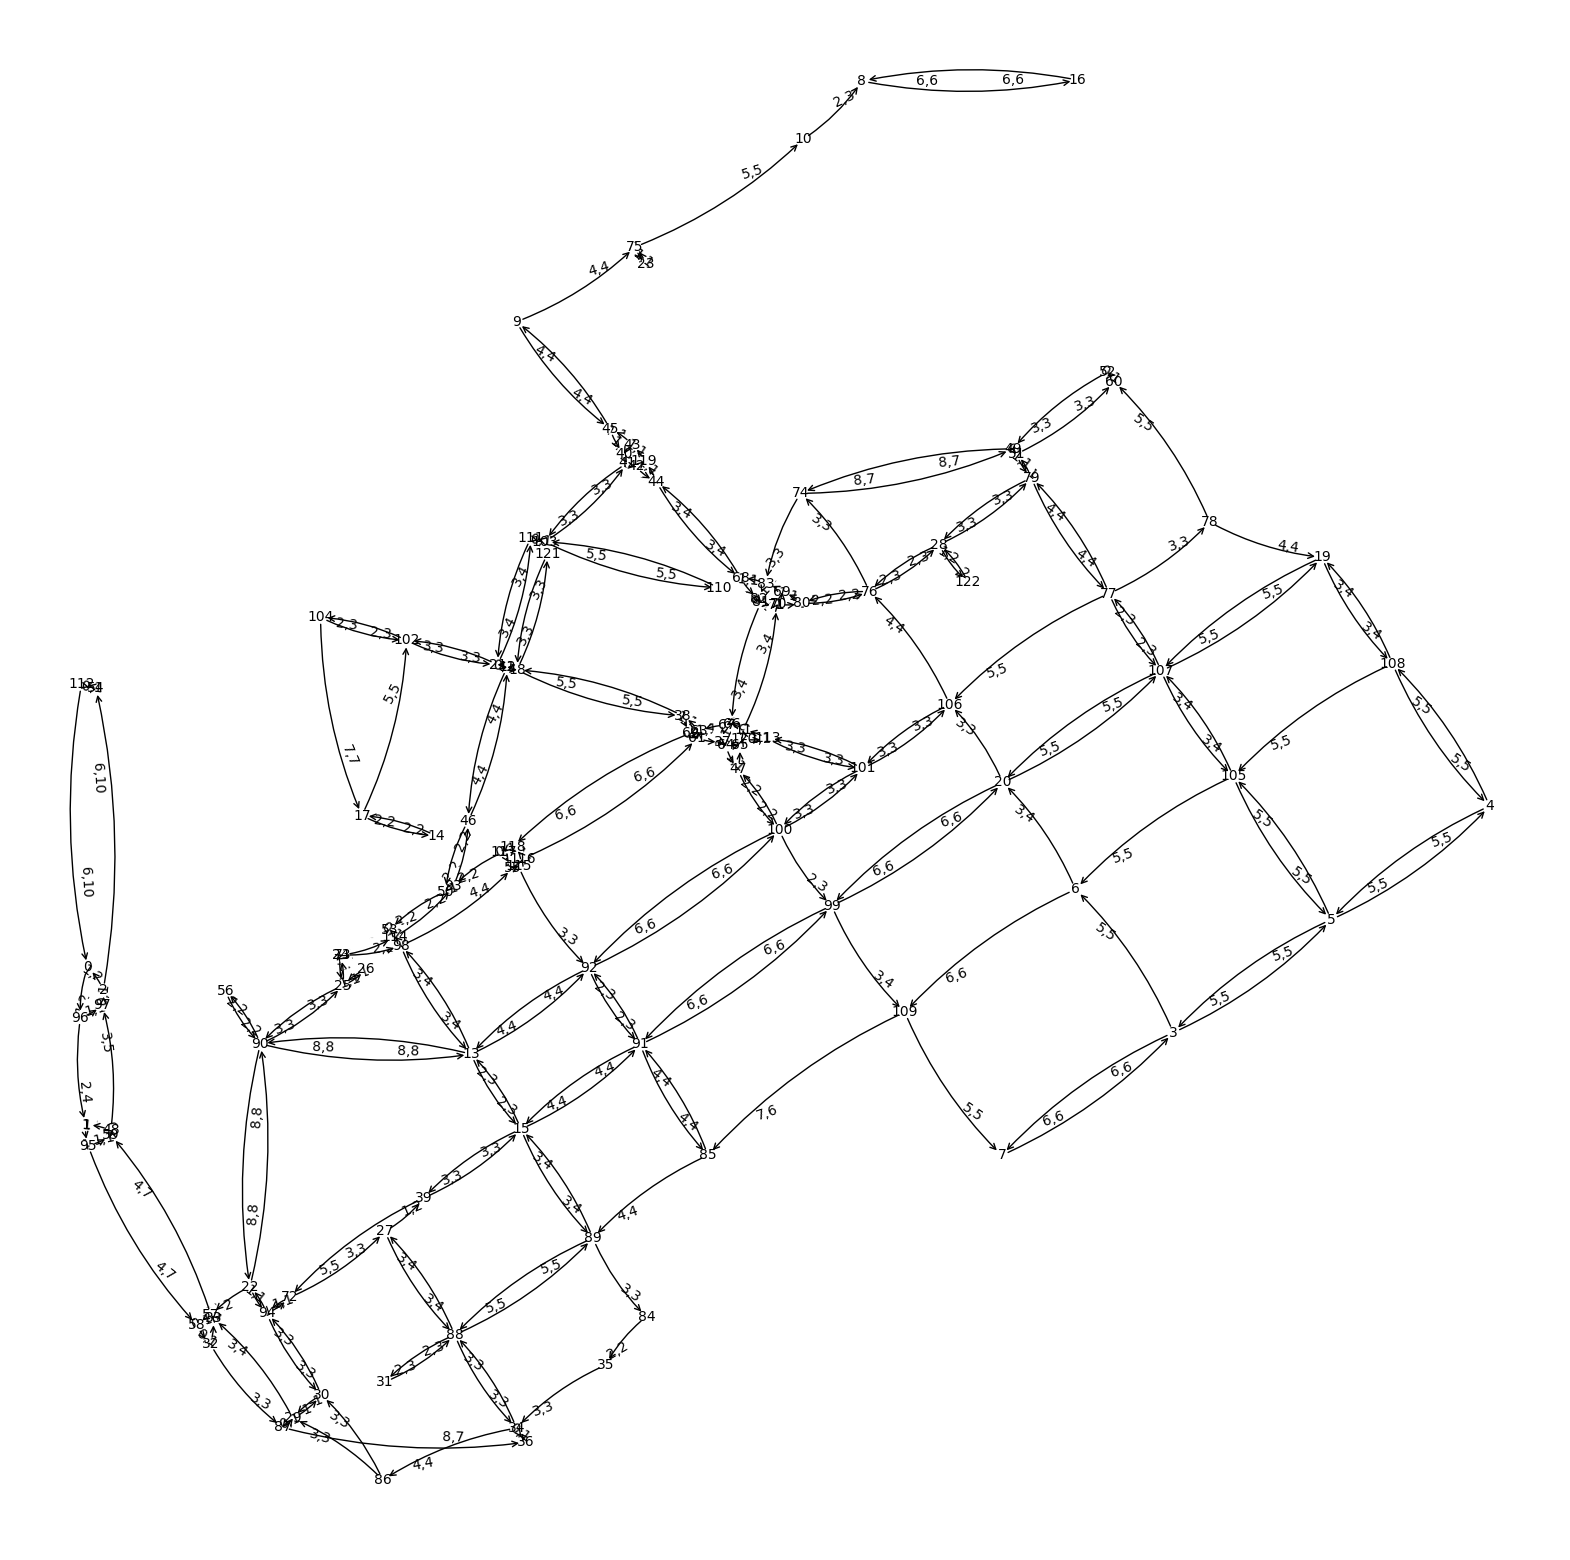

In [4]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(6,20,1),(6,100,3),(6,105,2)])
hf.plot_multigraph(graph, with_labels=True, font_size=10)

[((0, 5805.0), 0)]
31 0.0171875
*
****[((False, 87), 1), ((False, 87), 2)]
31 0.004296875
**
***[((False, 87), 2), ((False, 87), 3), ((False, 87), 4)]
31 1.1
********[((False, 87), 3), ((False, 87), 4), ((True, 99), 5), ((True, 99), 6)]
31 0.004296875
***
*****[((False, 87), 4), ((True, 99), 5), ((True, 99), 6), ((False, 87), 7), ((False, 87), 8)]
31 0.00107421875
************[((False, 87), 7), ((False, 87), 8), ((True, 89), 9), ((True, 89), 10), ((True, 99), 5), ((True, 99), 6)]
31 0.004296875
****
*******[((True, 99), 5), ((True, 99), 6), ((False, 87), 8), ((True, 89), 9), ((True, 89), 10), ((False, 87), 11), ((False, 87), 12)]
31 1.1
****************[((False, 87), 8), ((False, 87), 11), ((False, 87), 12), ((True, 89), 9), ((True, 89), 10), ((True, 99), 6), ((True, 99), 13), ((True, 99), 14)]
31 0.0021484375
**
*********[((True, 99), 6), ((True, 89), 9), ((True, 89), 10), ((False, 87), 11), ((False, 87), 12), ((True, 99), 13), ((True, 99), 14), ((False, 87), 15), ((False, 87), 16)]
3

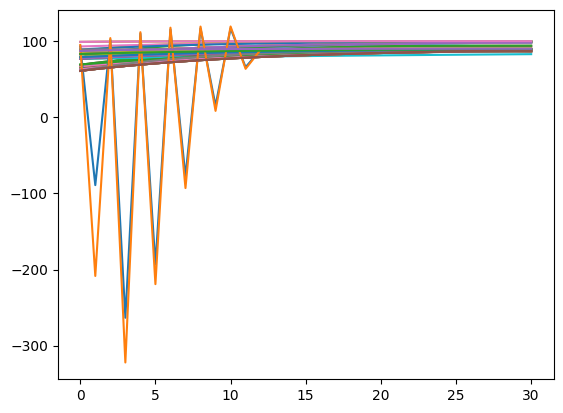

In [14]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=80,MAX_ITER_LR=30)

k	COLOR
0 	 b
1 	 r
2 	 g


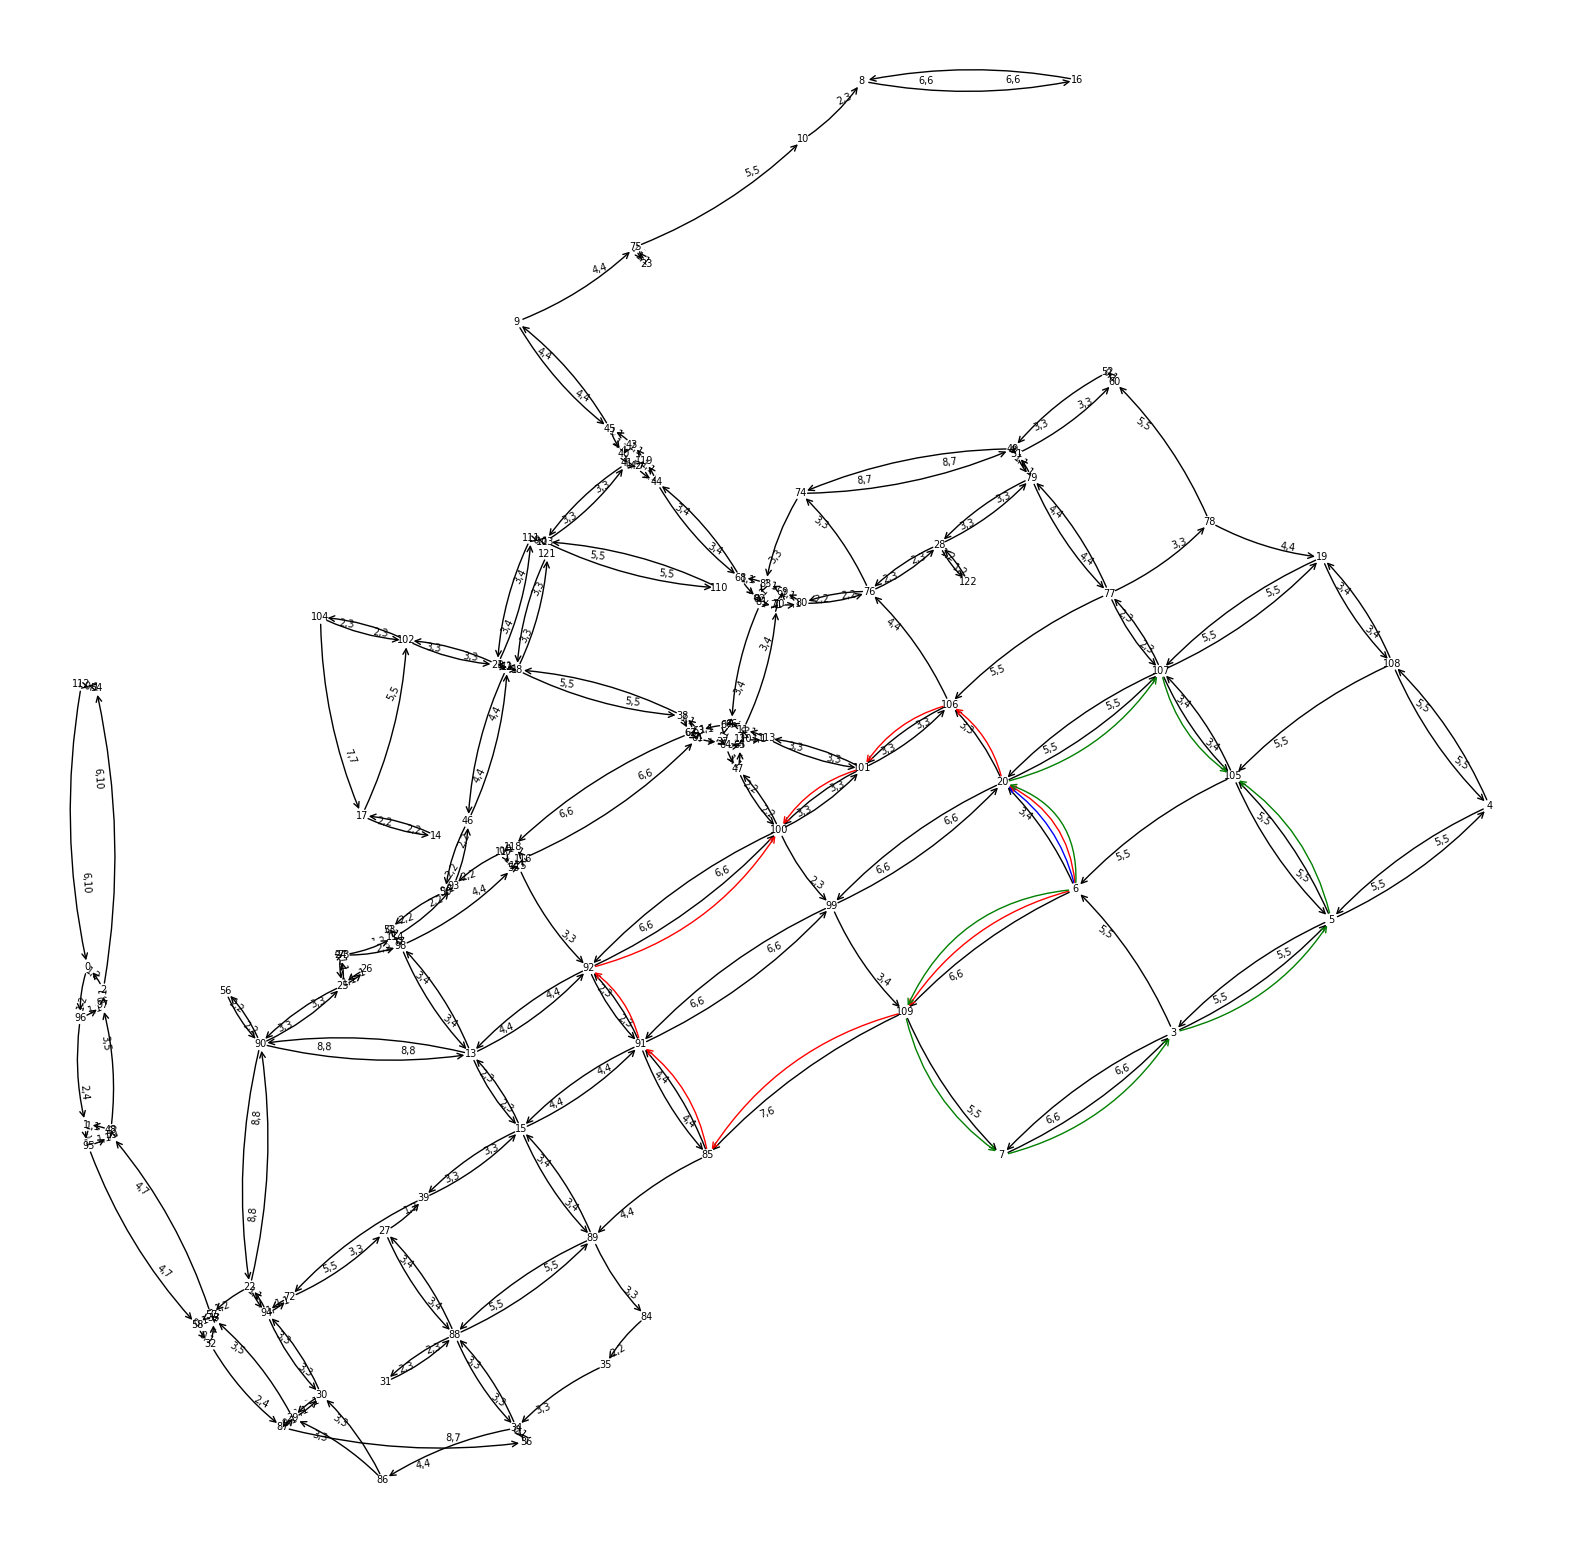

In [20]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

[((0, 5805.0), 0)]


/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


21 0.0171875
*
****[((False, 87), 1), ((False, 87), 2)]
21 0.1375
**
***[((False, 87), 2), ((False, 87), 3), ((False, 87), 4)]
21 1.1
********[((False, 87), 3), ((False, 87), 4), ((True, 97), 5), ((True, 97), 6)]
21 0.1375
***
*****[((False, 87), 4), ((True, 97), 5), ((True, 97), 6), ((False, 87), 7), ((False, 87), 8)]
21 0.1375
**
************[((False, 87), 7), ((False, 87), 8), ((False, 89), 9), ((False, 89), 10), ((True, 97), 5), ((True, 97), 6)]
21 0.1375
****
*******[((True, 97), 5), ((True, 97), 6), ((False, 87), 8), ((False, 89), 9), ((False, 89), 10), ((False, 87), 11), ((False, 87), 12)]
21 1.1
****************[((False, 87), 8), ((False, 87), 11), ((False, 87), 12), ((False, 89), 9), ((False, 89), 10), ((True, 97), 6), ((True, 97), 13), ((True, 97), 14)]
21 0.1375
**
*********[((True, 97), 6), ((False, 89), 9), ((False, 89), 10), ((False, 87), 11), ((False, 87), 12), ((True, 97), 13), ((True, 97), 14), ((False, 87), 15), ((False, 87), 16)]
21 1.1
****************[((False, 87),

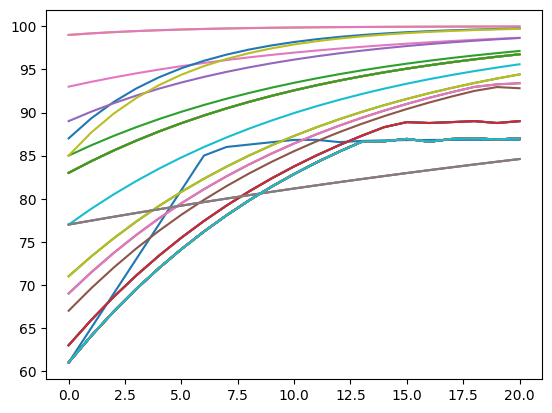

In [5]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=20)

k	COLOR
0 	 b
1 	 r
2 	 g


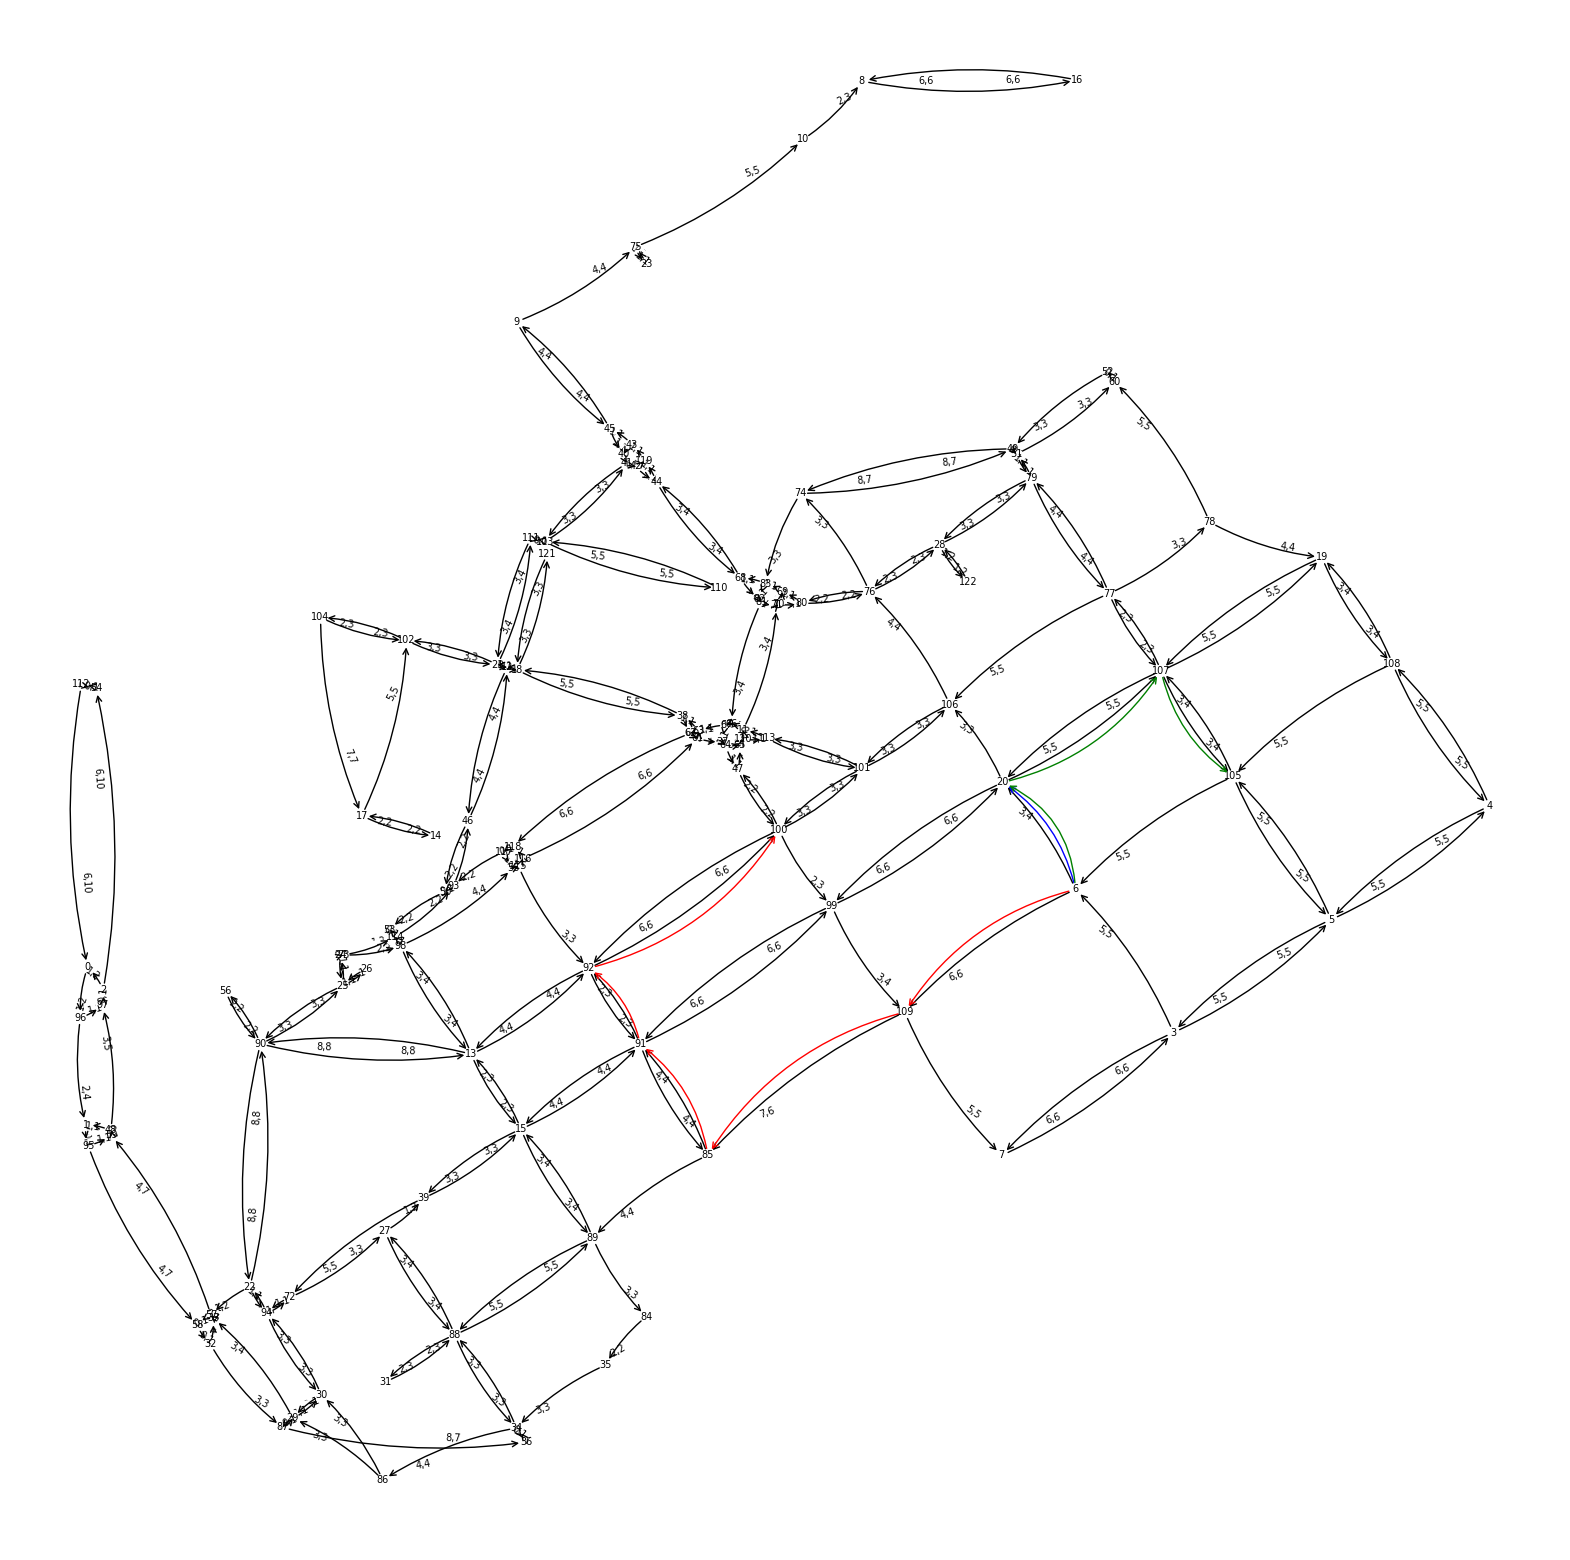

In [6]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

In [46]:
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>